In [7]:
import numpy as np
import random
import statistics
from math import sqrt
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
bedrooms = [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6]
prices = [120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488]

# create a dictionary to store the mean and median of prices for each bedroom count
bedroom_stats = {}

# loop through the unique bedroom counts in the dataset
for num_bedrooms in set(bedrooms):
    # filter the prices for the current number of bedrooms
    bedroom_prices = [prices[i] for i in range(len(bedrooms)) if bedrooms[i] == num_bedrooms]
    # compute the mean and median of the prices
    mean_price = sum(bedroom_prices) / len(bedroom_prices)
    median_price = sorted(bedroom_prices)[len(bedroom_prices) // 2]
    # store the mean and median in the dictionary
    bedroom_stats[num_bedrooms] = {"mean": mean_price, "median": median_price}

# print the results
for num_bedrooms in bedroom_stats:
    print(f"Bedrooms: {num_bedrooms}\tMean price: {bedroom_stats[num_bedrooms]['mean']:.2f}\tMedian price: {bedroom_stats[num_bedrooms]['median']}")


Bedrooms: 1	Mean price: 130.67	Median price: 133
Bedrooms: 2	Mean price: 171.25	Median price: 185
Bedrooms: 3	Mean price: 246.57	Median price: 244
Bedrooms: 4	Mean price: 309.00	Median price: 311
Bedrooms: 5	Mean price: 405.50	Median price: 415
Bedrooms: 6	Mean price: 488.00	Median price: 488


###  Extracts a random sample of size 10 from the Bedrooms data points

In [10]:
bedrooms = [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6]

random_sample = random.sample(bedrooms, k=10)

print(random_sample)

[1, 5, 3, 1, 1, 4, 2, 5, 3, 3]


### Compute the mean and standard deviation of the sample

In [5]:
bedrooms = [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6]
mean = statistics.mean(bedrooms)
print(f"The mean of the population is: {mean:.2f}")

The mean of the population is: 3.00


### Compute the the mean of the population

In [7]:
prices = [120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488]

mean = statistics.mean(prices)

print(f"The mean of the population is: {mean:.2f}")

The mean of the population is: 251.45


### Computer the confidence interval of 95% using the sample 

In [11]:
prices = [120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488]

sample = np.random.choice(prices, size=10)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
t_value = t.ppf(0.975, n - 1)

margin_of_error = t_value * sample_std / np.sqrt(n)
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"The 95% confidence interval is: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")


The 95% confidence interval is: (196.13, 360.67)


### Check if the population mean lies between the upper and lower bounds of the interval
Cl=x ̅  ±z.a/√n

In [14]:
prices = [120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488]

sample = np.random.choice(prices, size=10)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
z_critical = norm.ppf(0.975)

margin_of_error = z_critical * sample_std / np.sqrt(n)
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

population_mean = np.mean(prices)

if confidence_interval[0] <= population_mean <= confidence_interval[1]:
    print("The population mean is within the confidence interval.")
else:
    print("The population mean is outside the confidence interval.")


The population mean is within the confidence interval.


## Visualization

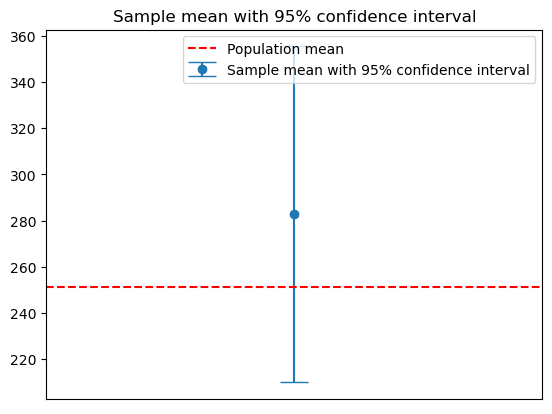

In [4]:


# Data
bedrooms = [1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 6]
prices = [120, 133, 139, 185, 148, 160, 192, 205, 244, 213, 236, 280, 275, 273, 312, 311, 304, 415, 396, 488]

# Sample
sample = np.random.choice(prices, size=10)

# Sample statistics
sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
n = len(sample)
z_critical = norm.ppf(0.975)

# Confidence interval
margin_of_error = z_critical * sample_std / np.sqrt(n)
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

# Plot
fig, ax = plt.subplots()
ax.errorbar(x=0, y=sample_mean, yerr=margin_of_error, fmt='o', capsize=10, label='Sample mean with 95% confidence interval')
ax.axhline(y=np.mean(prices), color='r', linestyle='--', label='Population mean')
ax.set_xticks([])
ax.legend()
ax.set_title('Sample mean with 95% confidence interval')
plt.show()


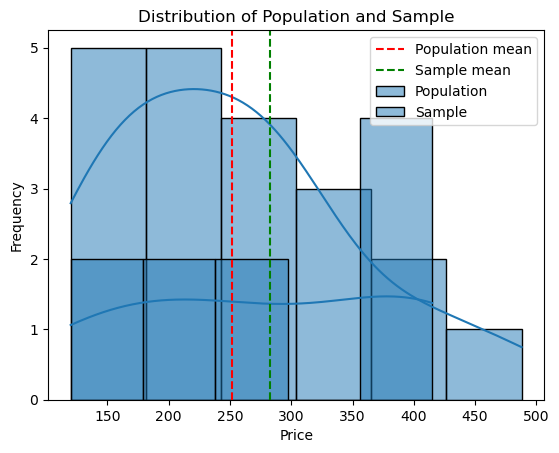

In [8]:
# Plot histograms
fig, ax = plt.subplots()
sns.histplot(prices, kde=True, label='Population', ax=ax)
sns.histplot(sample, kde=True, label='Sample', ax=ax)
ax.axvline(x=np.mean(prices), color='r', linestyle='--', label='Population mean')
ax.axvline(x=sample_mean, color='g', linestyle='--', label='Sample mean')
ax.set_xlabel('Price')
ax.set_ylabel('Frequency')
ax.legend()
ax.set_title('Distribution of Population and Sample')
plt.show()


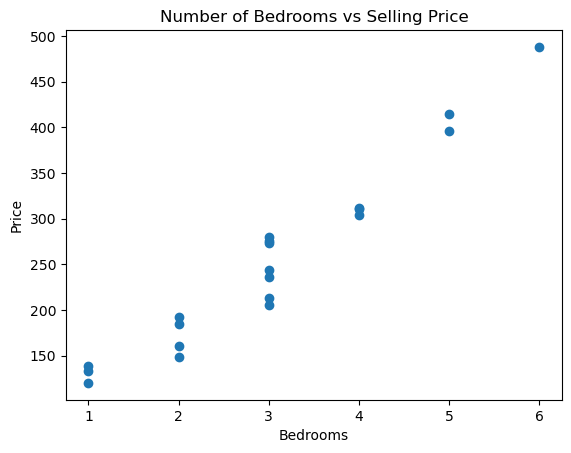

In [9]:
# Plot scatterplot
fig, ax = plt.subplots()
ax.scatter(bedrooms, prices)
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Number of Bedrooms vs Selling Price')
plt.show()


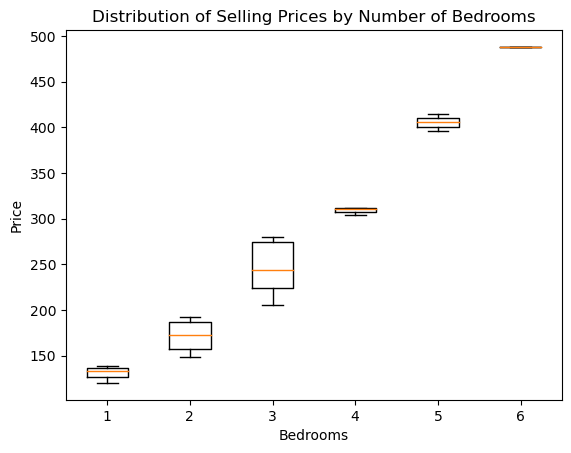

In [10]:
# Create dictionary to store prices by bedrooms
prices_by_bedrooms = {}
for b, p in zip(bedrooms, prices):
    if b not in prices_by_bedrooms:
        prices_by_bedrooms[b] = []
    prices_by_bedrooms[b].append(p)

# Create boxplot
fig, ax = plt.subplots()
ax.boxplot(prices_by_bedrooms.values())
ax.set_xticklabels(prices_by_bedrooms.keys())
ax.set_xlabel('Bedrooms')
ax.set_ylabel('Price')
ax.set_title('Distribution of Selling Prices by Number of Bedrooms')
plt.show()


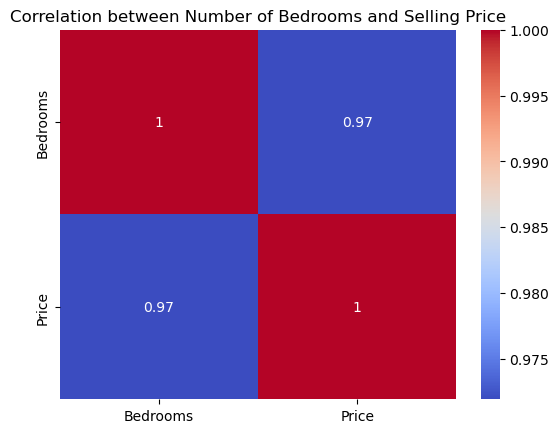

In [12]:
import numpy as np

# Compute correlation matrix
corr_matrix = np.corrcoef(bedrooms, prices)

# Plot heatmap
fig, ax = plt.subplots()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_xticklabels(['Bedrooms', 'Price'])
ax.set_yticklabels(['Bedrooms', 'Price'])
ax.set_title('Correlation between Number of Bedrooms and Selling Price')
plt.show()
